In [124]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

In [164]:
ints = pd.read_excel('data/interest.xlsx')
ints = ints.rename(columns={ints.columns[8]:'interest'}).drop('Timestamp',axis=1)
ints.at[2,'school'] = 'Oakland High School'
ints

,first_name,last_name,email,district,school,What were the factors that influenced your decision where to work?,class,interest,Please explain your response to the previous question.,May we follow up with you regarding your responses?
0,Precious,Listana,preshlistana@berkeley.edu,Oakland,NaN,"how long CS has been taught in the school, men...","Web Design, AP CS Principles",Interested,NaN,NaN
1,Cassidy,Nealon,cassidynealon@gmail.com,Oakland,NaN,Curriculum and mission statement,Chemistry and Physics,Interested,I would be interested in being able to provide...,Yes
2,Katie,Nguyen,katie_nguyen@berkeley.edu,Oakland,Oakland High School,I student-taught at Oakland High and really li...,"English 1, English 3, Academic ELD",Slightly Interested,Iâ€™m primarily an English teacher and that is...,Yes
3,Kaili,Carr,lkaicarr@gmail.com,Oakland,Coliseum College Prep Academy,Mission and vision of the school and colleague...,Science 6/7th grade,Slightly Interested,I have little to no experience and have not be...,Yes
4,Rebecca,Longworth,rebecca.longworth@gmail.com,Albany,Albany High School,"Salary, school climate, total # students, tota...",English 1 and Senior Composition / Science Fic...,Slightly Interested,I am more interested in integrating digital li...,Yes
5,Tsu-Ann,Chen,suzanne_chen@berkeley.edu,West Contra Costa,Richmond High School,Previous familiarity with school staff and com...,English 2 and CSU Expository Reading and Writing,Slightly Interested,I am interested in computer science-integrated...,Yes
6,Edward,Tahmassian,edtahmassian@berkeley.edu,Glendale,Glendale High School,To provide modern education to a community wit...,Chemistry,Slightly Interested,Since I do not have a degree in computer scien...,Yes
7,Emily,Blumenthal,emnibl@gmail.com,Oakland,Oakland High School,I really was interested in working at a school...,Algebra 1 Success and Algebra 2,Slightly Interested,I'm potentially interested in teaching compute...,Yes
8,Courtney,McGuire,mcguirec87@gmail.com,Oakland,Madison Park Academy,"Helpful coworkers and supervisors, care for st...",6th Grade Math and Science,Interested,"I am interested in teaching computer science, ...",Yes
9,Isabella,Elmore,isabella_elmore@berkeley.edu,Oakland,NaN,"My student teaching placement, and the fact th...",I am currently teaching a 2nd grade multiple s...,Slightly Interested,I am interested in teaching Computer Science a...,Yes


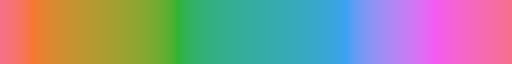

In [298]:
col = sns.color_palette("husl", as_cmap=True)
col

## Districts Represented in survey

Text(0.5, 1.0, 'Districts Represented')

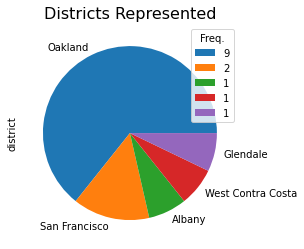

In [165]:
district = ints.district.value_counts().plot(kind='pie')
plt.plot(color=col)
plt.legend(ints.district.value_counts(), title='Freq.', loc='best')
plt.title(label='Districts Represented', fontsize=16)

## Schools Represented in survey

Text(0.5, 1.0, 'Schools Represented')

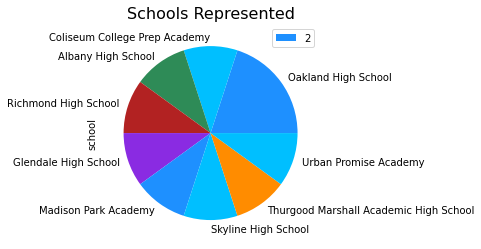

In [316]:
school = ints.school.value_counts().plot(kind='pie', colors=['dodgerblue','deepskyblue','seagreen','firebrick','blueviolet','dodgerblue','deepskyblue','darkorange','deepskyblue'])
plt.legend(labels=['2'], loc='upper right')
plt.title(label='Schools Represented', fontsize=16)

Colors correspond to district level. Blue = OUSD | Orange = SFUSD | Green = AUSD | Red = WCCUSD | Purple = GUSD

In [260]:
# create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax2 = ints.school.value_counts().plot(kind='pie')
ax1 = ints.district.value_counts().plot(kind='pie')
plt.legend(loc='best')

ax2.pie?
plt.close()

In [259]:
# create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(ints.district.value_counts())
ax2.pie(ints.school.value_counts())
plt.legend(loc='best')

# needs labels
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [319]:
fig, ax = plt.subplots()

size = 0.5
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect='equal', title='INCOMPLETE Pie plot of Districts and Schools')
plt.close()

In [ ]:
outer = ints.groupby('district').sum()
inner = ints.groupby(['district', 'school']).sum()
inner_labels = inner.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer.index.values.flatten(), radius=1,
       labels=outer.index,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.index.values.flatten(), radius=1-size, 
       labels=inner_labels,
       wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

## Subjects taught by respondents

### Humanities vs. STEM

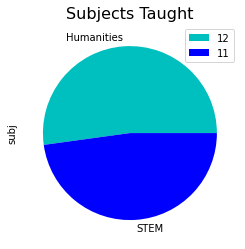

In [321]:
stem_plot = subj['subj'].value_counts().plot(kind='pie', colors=['c', 'b'])
plt.title(label='Subjects Taught', fontsize=16)
plt.legend(subj.subj.value_counts())

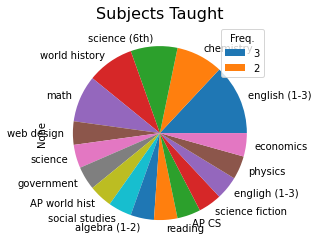

In [266]:
ints['class'].tolist()
pd.Series(range(2),['web design', 'AP CS'])

subj = pd.Series(['web design', 'AP CS', 'chemistry', 'physics', 'engligh (1-3)', 'science (6th)', 'english (1-3)', 'science fiction', 'chemistry', 'algebra (1-2)', 'math', 'science (6th)', 'math', 'reading', 'science', 'social studies', 'world history', 'AP world hist', 'world history', 'government', 'economics', 'english (1-3)', 'english (1-3)'], range(23))
subjects = subj.value_counts().plot(kind='pie')
plt.title(label='Subjects Taught', fontsize=16)
plt.legend(labels=['3', '2'], title='Freq.', loc='best')


In [267]:
stem = ['web design', 'AP CS', 'chemistry', 'physics', 'science (6th)', 'science fiction', 'algebra (1-2)', 'math']
subj = pd.DataFrame(subj).rename(columns={0:'subject'})
subj['subj'] = np.nan

for i in subj.index:
    if subj.loc[i, 'subject'] in stem:
        subj.loc[i, 'subj'] = 'STEM'
    else:
        subj.loc[i, 'subj'] = 'Humanities'

## Interest in Teaching CS

Text(0.5, 1.0, 'Interest in Teaching CS')

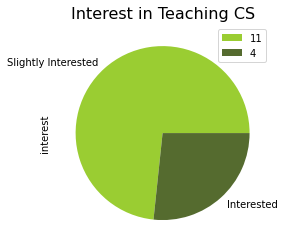

In [320]:
interest = ints.interest.value_counts().plot(kind='pie', colors=['yellowgreen','darkolivegreen'])
plt.legend(ints.interest.value_counts(), loc='best')
plt.title(label='Interest in Teaching CS', fontsize=16)

## Key Takeaways from Teachers

### Key Takeaways
NOT READY:
- Desire to Integrate CS into both non-STEM (Eng, Hist) and STEM (Alg) courses as an interdisciplinary subject
- BUT lacking technical capacity (and confidence) to teach CS (Eng, Sci, Alg). Need more hands-on experience coding/programming
    - Hope to understand best practices and develop personal pedagogy
- Need better time management to engage with & benefit from BE3 workshops and learning materials"
- CS doesn't seem as impactful as other topics when it comes to helping students shape their worldviews
- CS is not widely available to teach at schools

READY:
- Ready to teach CS but lacking reference materials (ie. curricula on hand). Would be ready given materials
- Some are already integrating basic CS into STEM courses. Open to expanding content knowledge to diversify curriculum (Chem)